# Deep Learning with Python - Chapter 3
## Example 1 - IMDB Binary Classification

In [39]:
# importing keras and tf for backend 
import tensorflow as tf
import keras

# Necessary for reading dataset
import numpy as np
old = np.load
np.load = lambda *a,**k: old(*a, allow_pickle=True, **k)

`IMDB` dataset comes preloaded with Keras. It is a dataset of 50k movie reviews that have already been preprocessed/tokenized. 

**If first time running this Notebook, 80MB dataset will be downloaded**.

In [2]:
from keras.datasets import imdb

In [3]:
# train/test split - each review is limited to having 10k most frequent words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [4]:
# explore training and test data
print(train_data[0][:10])    # first ten words 
print(train_labels[0])       # binary flag

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
1


In [59]:
# Limiting ourselves to top 10k words, so no word index exceeds 10k

# This list comprehension prints the largest word index in each tokenized review of training data
[max(word_index) for word_index in train_data][:10]

[7486, 9837, 6905, 9941, 7224, 7982, 9363, 9820, 7612, 8419]

In [6]:
# Confirm that there is one word_index per review
print(len([max(word_index) for word_index in train_data]))

25000


In [7]:
# Confirm further that the largest word index amongst all revies is < 10k
print(max([max(word_index) for word_index in train_data]))

9999


In [8]:
# In dataset, each word is encoded as a number. Check word corresponding to each index
word_index = imdb.get_word_index()

The first three indexes are reserved for `<START>`, `<STOP>`, `<UNKNOWN>` and `<UNUSED>`.

In [9]:
# Get the dictionary mapping individual words to index numbers
word_index = imdb.get_word_index()

# Create a new dictionary in which the index number is the key and the word is the value
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

# Decode message by looking up value for each index number in the message
# Shift by 3 is necessary because first three indices were reserved for 
# padding, start, and unknown, and have been removed.
decoded_review = ' '.join(
    # returns '?' if index i - 3 not found
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### One-Hot Encoding
All messages are converted to vectors of dimension 10k. These are sparse vectors: each column of the vector represents one of the 10k possible words that can be present in a message. When any word is present in a message, the value in its corresponding  column is 1

In [14]:
def vectorize_sequences(sequences, dimension=10000):
    # Matrix with one row per message and one column per possible word
    results = np.zeros((len(sequences), dimension))
    
    # For every word in the message, set the corresponding column value to 1
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    # Return sparse one-hot encoded matrix
    return results

In [15]:
# One-Hot encode the training and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [16]:
# After one hot encoding 
x_train[0] # 1 if word at that index occurs in the message, 0 otherwise

array([0., 1., 1., ..., 0., 0., 0.])

In [17]:
# Vectorize labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Building the Network

In [18]:
from keras import models, layers

# Create a Sequential model
model = models.Sequential()

# Add input layer - 16 units
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

# Add hidden layer - 16 units
model.add(layers.Dense(16, activation='relu')) # input shape automatically inferred

# Add output layer - 1 unit that predicts a probability
model.add(layers.Dense(1, activation='sigmoid'))

### Configuring the Network

In [19]:
# Prepare the network for training by specifying how it will measure
# its performance, how it will measure the difference between actual and predicted
# behaviour, and how it will minimise the difference (what variant of SGD)
model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy',
             metrics=['accuracy'])

### Defining Validation Set
The validation set is a subset of the training set that the model will use during training to assess its accuracy on data that it has never seen before. 

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Train Model

In [21]:
history = model.fit(
    partial_x_train, partial_y_train, epochs=20,
    batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 244us/step - loss: 0.5086 - acc: 0.7821 - val_loss: 0.3799 - val_acc: 0.8686
Epoch 2/20
15000/15000 [==============================] - 1s 97us/step - loss: 0.3005 - acc: 0.9046 - val_loss: 0.3005 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.2180 - acc: 0.9282 - val_loss: 0.3085 - val_acc: 0.8718
Epoch 4/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.1750 - acc: 0.9433 - val_loss: 0.2840 - val_acc: 0.8838
Epoch 5/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.1426 - acc: 0.9543 - val_loss: 0.2848 - val_acc: 0.8864
Epoch 6/20
15000/15000 [==============================] - 1s 98us/step - loss: 0.1149 - acc: 0.9655 - val_loss: 0.3156 - val_acc: 0.8771
Epoch 7/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.0980 - acc: 0.9705 - val_loss: 0.3126 - val_

In [24]:
# History object contains data about everything that happened during training
history_dict = history.history

# Dictionary keys are the different parameters it has stord
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

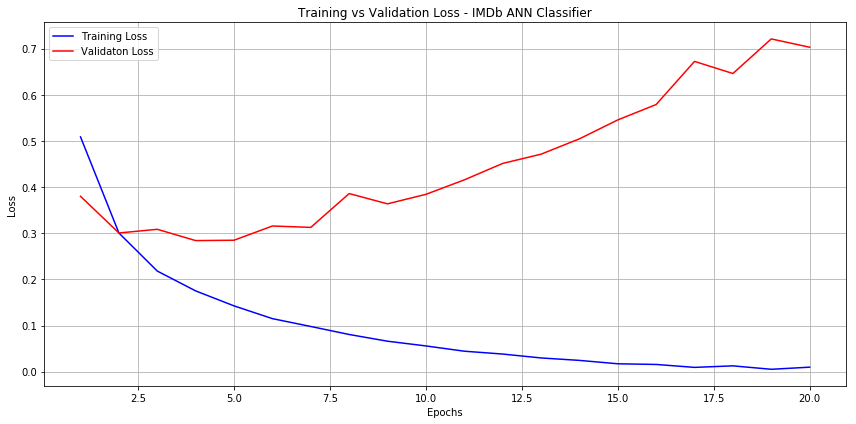

In [28]:
# To plot validation and training accuracy and loss
import matplotlib.pyplot as plt
%matplotlib inline

# store loss values from history
train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Epochs are not zero indexed
epochs = range(1, len(history_dict['acc']) + 1)

# Plot the loss
plt.figure(figsize=(12,6)); 
plt.plot(epochs, train_loss_values, 'b-', label='Training Loss')
plt.plot(epochs, val_loss_values, 'r-', label='Validaton Loss')
plt.xlabel('Epochs'); plt.ylabel('Loss'); plt.legend(); plt.grid(True);
plt.title('Training vs Validation Loss - IMDb ANN Classifier')
plt.tight_layout()

The results show that while the training loss decreased with increasing epochs, the validation set loss actully increased.

Text(0.5,1,'Training vs Validation Accuracy - IMDb ANN Classifier')

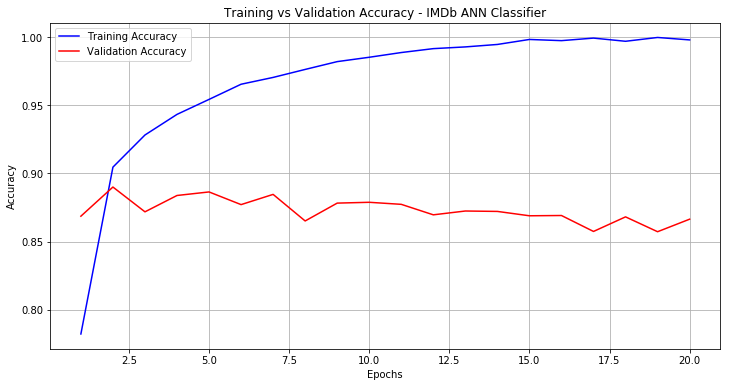

In [30]:
# Get data
train_acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

# Plot training and validation accuracy
plt.figure(figsize=(12,6))
plt.plot(epochs, train_acc_values, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r-', label='Validation Accuracy')
plt.grid(True); plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend()
plt.title('Training vs Validation Accuracy - IMDb ANN Classifier')

### Training a Network with 4 Epochs

In [33]:
# Instantiate
model = models.Sequential()

# Add layers
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
            metrics=['accuracy'])

# Train
model.fit(x_train, y_train, epochs=4, batch_size=512)

# Get accuracy on test set
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 81us/step - loss: 0.4466 - acc: 0.8243
Epoch 2/4
25000/25000 [==============================] - 2s 65us/step - loss: 0.2556 - acc: 0.9099
Epoch 3/4
25000/25000 [==============================] - 2s 66us/step - loss: 0.1968 - acc: 0.9300
Epoch 4/4
25000/25000 [==============================] - 4s 154us/step


In [34]:
# What are the final results?
results

[0.31688259531974794, 0.87516]

In [35]:
# Use the model to make predictions
model.predict(x_test)

array([[0.295065  ],
       [0.9996718 ],
       [0.93878824],
       ...,
       [0.16449548],
       [0.15535626],
       [0.75665873]], dtype=float32)

# Experiment 1 - Varying Layers

## Experiment 1a - No Hidden/Input Layer

In [48]:
# Instanitate model
model = models.Sequential()

# Add a single layer - probability
model.add(layers.Dense(1, activation='sigmoid', input_shape=(10000,)))

# Compile
model.compile(loss='binary_crossentropy', 
             optimizer='rmsprop',
             metrics=['accuracy'])

# Train
model.fit(partial_x_train, partial_y_train, 
          epochs=20, batch_size=512,
         validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.6136 - acc: 0.7475 - val_loss: 0.5615 - val_acc: 0.8084
Epoch 2/20
15000/15000 [==============================] - 1s 76us/step - loss: 0.5161 - acc: 0.8450 - val_loss: 0.5024 - val_acc: 0.8213
Epoch 3/20
15000/15000 [==============================] - 1s 73us/step - loss: 0.4551 - acc: 0.8677 - val_loss: 0.4525 - val_acc: 0.8505
Epoch 4/20
15000/15000 [==============================] - 1s 80us/step - loss: 0.4092 - acc: 0.8810 - val_loss: 0.4185 - val_acc: 0.8606
Epoch 5/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.3737 - acc: 0.8925 - val_loss: 0.3934 - val_acc: 0.8656
Epoch 6/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.3454 - acc: 0.9008 - val_loss: 0.3723 - val_acc: 0.8723
Epoch 7/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.3224 - acc: 0.9073 - val_loss: 0.3557 - val_ac

Achieved a maximum validation set accuracy of 94.76! This could mean maybe a second linear transformation was unnecessary. 

In [49]:
# Evaluate model performance
results = model.evaluate(x_test, y_test)

print(results)

25000/25000 [==============================] - 1s 54us/step
[0.2979289028835297, 0.88384]


Test set accuracy increased from 87.5 to 88.3 percent, which shows that there may still be some overfitting.

## Experiment 1b - Three Hidden Layers

In [51]:
# Instantiate model
model = models.Sequential()

# Add input layer
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

# First hidden layer
model.add(layers.Dense(16, activation='relu'))

# Second hidden layer
model.add(layers.Dense(16, activation='relu'))

# Third hidden layer
model.add(layers.Dense(16, activation='relu'))

# Output layer
model.add(layers.Dense(1, activation='sigmoid'))


# Compile and Train
model.compile(loss='binary_crossentropy', optimizer='rmsprop',
             metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, 
         epochs=20, batch_size=512,
         validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 154us/step - loss: 0.6175 - acc: 0.7370 - val_loss: 0.4983 - val_acc: 0.8644
Epoch 2/20
15000/15000 [==============================] - 1s 95us/step - loss: 0.3831 - acc: 0.8918 - val_loss: 0.3586 - val_acc: 0.8655
Epoch 3/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.2547 - acc: 0.9165 - val_loss: 0.2931 - val_acc: 0.8891
Epoch 4/20
15000/15000 [==============================] - 1s 96us/step - loss: 0.1884 - acc: 0.9394 - val_loss: 0.2786 - val_acc: 0.8913
Epoch 5/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.1501 - acc: 0.9500 - val_loss: 0.2966 - val_acc: 0.8854
Epoch 6/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.1182 - acc: 0.9631 - val_loss: 0.3065 - val_acc: 0.8822
Epoch 7/20
15000/15000 [==============================] - 2s 105us/step - loss: 0.0974 - acc: 0.9728 - val_loss: 0.4093 - val

Training set accuracy approaches 100 but validation set accuracy is 86.55, suggesting that the addition of a third hidden layer has led to considerable overfitting - the model does not generalize well to data that it has not seen before.

In [52]:
results = model.evaluate(x_test, y_test)
print(results)

25000/25000 [==============================] - 3s 100us/step
[0.8731731408023834, 0.84892]


As expected, the accuracy on the test set is much lower than with one hidden layer. Surprisingly, the loss value is higher than the actual accuracy, which suggests I may have done something wrong.

## Experiment 1c - One Hidden Layer

In [57]:
# Instantiate model
model = models.Sequential()

# Input layer and the only hidden layer
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile
model.compile(metrics=['accuracy'], loss='binary_crossentropy',
             optimizer='rmsprop')

# Fit
model.fit(partial_x_train, partial_y_train, 
         epochs=20, batch_size=512, 
         validation_data=(x_val, y_val))

# Evaluate
results = model.evaluate(x_test, y_test)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.5111 - acc: 0.7873 - val_loss: 0.3970 - val_acc: 0.8570
Epoch 2/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.3069 - acc: 0.9010 - val_loss: 0.3076 - val_acc: 0.8835
Epoch 3/20
15000/15000 [==============================] - 2s 137us/step - loss: 0.2227 - acc: 0.9280 - val_loss: 0.2828 - val_acc: 0.8875
Epoch 4/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.1759 - acc: 0.9433 - val_loss: 0.2766 - val_acc: 0.8880
Epoch 5/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.1408 - acc: 0.9527 - val_loss: 0.2828 - val_acc: 0.8878
Epoch 6/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.1136 - acc: 0.9642 - val_loss: 0.2991 - val_acc: 0.8849
Epoch 7/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.0933 - acc: 0.9723 - val_loss: 0.3304 - 

In [58]:
print(results)

[0.78794461322546, 0.8496]


## Summary of Results - Experiment 1
- The highest validation set accuracy achieved was 88.34% when there was no hidden or input layer. The data was fed directly to the output layer, which computed a probability using the weighted sum of the inputs.
- Increasing the number of layers led to serious overfitting. With three hidden layers, the validation set accuracy dropped to 86.55 while the training set accuracy approached 100. Test set accuracy was even lower - 84.32, which suggests that even validation set accuracy is not a lower bound for actual performance.
- A model with only one layer did not fare much better: at 84.96, its test set accuracy was only marginally higher than that of a 3 hidden layer model. 

# Experiment 2 - Number of Units in Hidden Layer
**Hypothesis**: Increasing the number of hidden units will initially increase the validation set and test set accuracy as more units will mean more flexibility and decreasing bias. But excessive hidden units (64) will cause overfitting as the variance will increase disproportionately w.r.t the decreasing bias.

## Experiment 2a - 32 hidden units

In [76]:
# Define a function that will instantiate a model with the specified number of units per layer
def create_model(units_per_layer):
    """Creates an ANN which passes a tensor of 10k dimensional vectors through two densely connected layers of recitifed linear unit
    activation before otuputting a sigmoid probability. Number of units per layer is defined by user."""
    model = models.Sequential()
    model.add(layers.Dense(units_per_layer, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(units_per_layer, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Once instantiated, return the model
    return model

In [112]:
# Function to automate testing
def train_model(model, train_samples, train_labels, val_samples, val_labels):
    """Train a given model using the specified training and validation sets. Return history object for model"""
    # Compile
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    
    # Fit
    history = model.fit(x=train_samples, y=train_labels, validation_data=(val_samples, val_labels), 
             epochs=4, batch_size=512, verbose=0)
    
    # Message to confirm completion of training
    print("Training done.")
    
    # Return history
    return history

In [113]:
# Instantiate three models for testing - 16 nodes, 32 nodes, and 64 nodes per layer
model_16 = create_model(16)
model_32 = create_model(32)
model_64 = create_model(64)

In [114]:
# Train and record history of each sample
model_16_hist = train_model(model_16, partial_x_train, partial_y_train, x_val, y_val)
model_32_hist = train_model(model_32, partial_x_train, partial_y_train, x_val, y_val)
model_64_hist = train_model(model_64, partial_x_train, partial_y_train, x_val, y_val)

Training done.
Training done.
Training done.


In [115]:
# From each model's history
for hist_data in [model_16_hist, model_32_hist, model_64_hist]:
    print("-------------------------------------")
    # Print the value of each metric from the last epoch
    for (key, values) in hist_data.history.items():
        print(key + " = " + str(values[-1]))

-------------------------------------
val_loss = 0.2818631315231323
val_acc = 0.8891000003814697
loss = 0.1855263468503952
acc = 0.9408666666348775
-------------------------------------
val_loss = 0.3048083951950073
val_acc = 0.8818000001907349
loss = 0.15426329040527345
acc = 0.9460000000635783
-------------------------------------
val_loss = 0.3453937162399292
val_acc = 0.8694999997138977
loss = 0.13932128021717072
acc = 0.9503999998410543


In [116]:
# Performance metrics stored in list of tuples (model_loss, model_acc)
model_performance = []

# Evaluate each model using the test set
for model in [model_16, model_32, model_64]:
    (model_loss, model_acc) = model.evaluate(x_test, y_test)
    model_performance.append((model_loss, model_acc))
    
# Echo model performance - 16, 32, 64
model_performance

25000/25000 [==============================] - 3s 106us/step


[(0.3050468949794769, 0.87684),
 (0.3205286073923111, 0.87152),
 (0.38274630262374876, 0.85716)]

## Analysis of Results
- Training set shows that validation loss, validation accuracy, test loss, and test accuracy are optimal for an ANN with 16 nodes per layer.
- Increasing the number of nodes per layer seems to decrease the validation set accuracy, although the decrease from 16 -> 32 is much lower than that from 32 -> 64.
- This could suggest that 16 nodes per layer is the optimal number of nodes among the three.
- However, when the same ANN was tested on 20 epochs, the 64 layer neural network had the highest accuracy and lowest loss.
- Overfitting due to the increased number of epochs seems to have a more substantial effect on the model accuracy than overfitting due to increased number of units.

# Experiment 3 - `mse` vs `binary_crossentropy`
**Hypothesis**: Binary cross-entropy is a better loss function for binary classifiation. It quantizes accuracy by measuring the difference between the predicted and actual probability distributions for a dataset. MSE is better suited for regression problems instead of binary classification ones.

In [120]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
bin_cross_training = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, verbose=0, 
                              validation_data=(x_val, y_val))
bin_cross_results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 105us/step


In [121]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
mse_training = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, verbose=0, 
                              validation_data=(x_val, y_val))
mse_results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 90us/step


In [125]:
# Comparing Training and Validation Results
print("LAST EPOCH'S METRICS")
for model_history in [bin_cross_training, mse_training]:
    for (key, value) in model_history.history.items():
        print(key + " = " + str(value[-1]))
    print("-----------------------------------------")

LAST EPOCH'S METRICS
val_loss = 0.2734814458847046
val_acc = 0.8894999999046326
loss = 0.18848649396101633
acc = 0.9413333336194356
-----------------------------------------
val_loss = 0.3293539672374725
val_acc = 0.8818999999046325
loss = 0.08534907901883125
acc = 0.9752666668256124
-----------------------------------------


In [127]:
# Comparing Testing Results
print("TESTING RESULTS")
print("Binary Cross Entropy".upper())
print(bin_cross_results)

print("\nMean Squared Error".upper())
print(mse_results)

TESTING RESULTS
BINARY CROSS ENTROPY
[0.2912606569290161, 0.88496]

MEAN SQUARED ERROR
[0.352365430727005, 0.86812]


## Analysis of Results
- Binary cross-entropy is indeed a better loss function for the binary classification task, as it leads to an 88.5 percent test set accuracy and a total loss of 0.29126 compared to the MSE accuracy of 86.812.
- However, these results also show that the even though MSE is usually associated with regression problems, it can still be used to optimise neural nets for classification problems.
- This is evidenced by the MSE test set accuracy of 86.812, which is still pretty high, all things considered.

# Experiment 4 - `tanh` Activation Function
**Hypothesis**: The hyperbolic tangent function `tanh` will map any given input to the range $[-1, 1]$. I don't understand how this is a good choice for the output layer which is supposed to predict probabilities (between 0 and 1), but since this was a popular activation function before `ReLU`, I'm assuming it will give satisfactory results.

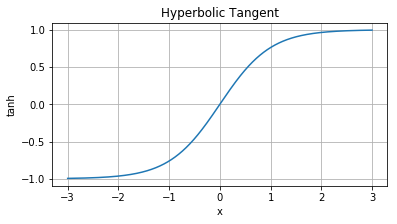

In [132]:
# First, confirming that `tanh` does look like I think it looks
x = np.arange(-3, 3, 0.001);
y = np.tanh(x)
plt.figure(figsize=(6,3)); plt.plot(x, y); plt.grid(True);
plt.xlabel('x'); plt.ylabel('tanh'); plt.title('Hyperbolic Tangent');

In [135]:
# Creating a model with the hyperbolic tan function for activation
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

tanh_model_train = model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, 
         validation_data=(x_val, y_val), verbose=0)

tanh_model_test = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 87us/step


In [137]:
# TRAINING RESULTS
print("Training Results") 
for (key, value) in tanh_model_train.history.items():
    print(key + " = " + str(value[0]))
    
print("\n--------------------------\nTest Results")
print(tanh_model_test)

Training Results
val_loss = 0.37772479724884034
val_acc = 0.8695999998092652
loss = 0.49602046639124553
acc = 0.8003333331425985

--------------------------
Test Results
[0.31047076488494874, 0.87192]


## Analysis of Results
- Surprisingly, the training set accuracy is lower than the validation set and test set accuracies!
- However, the loss is signficantly higher in both cases. 
- Not sure why this is happening, but the hyperbolic tan function seems to give an even better accuracy than the rectified linear unit function.